# Candlestick Chart Example

# mplfinance

## https://github.com/matplotlib/mplfinance

In [1]:

import yfinance as yf
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
symbol = "NVDA"
start = "2020-12-01"
end = "2021-10-04"
data = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


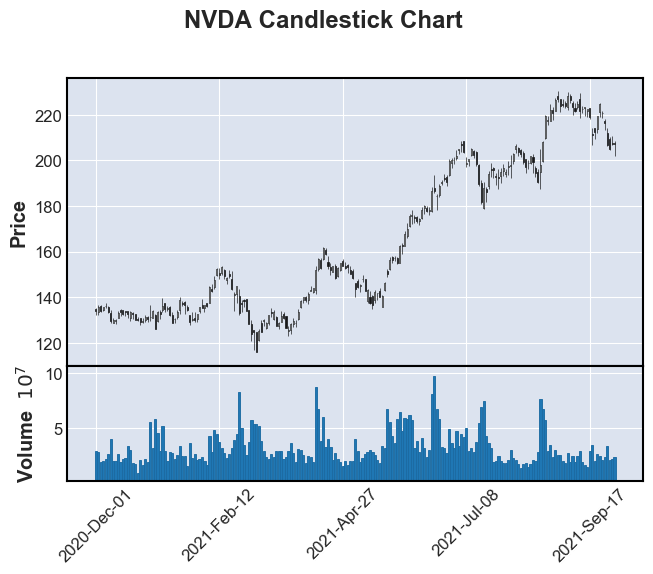

In [3]:
mpf.plot(data,volume=True,type='candle',
        #savefig=dict(fname=figsave("full"),dpi=1200)
        title = symbol + " Candlestick Chart")

In [4]:
import datetime
x=datetime.datetime.now()
y=str(x.year-1)+'-'+str(x.strftime("%m"))
z=str(x.year)+'-'+str(int(x.strftime("%m"))-1)

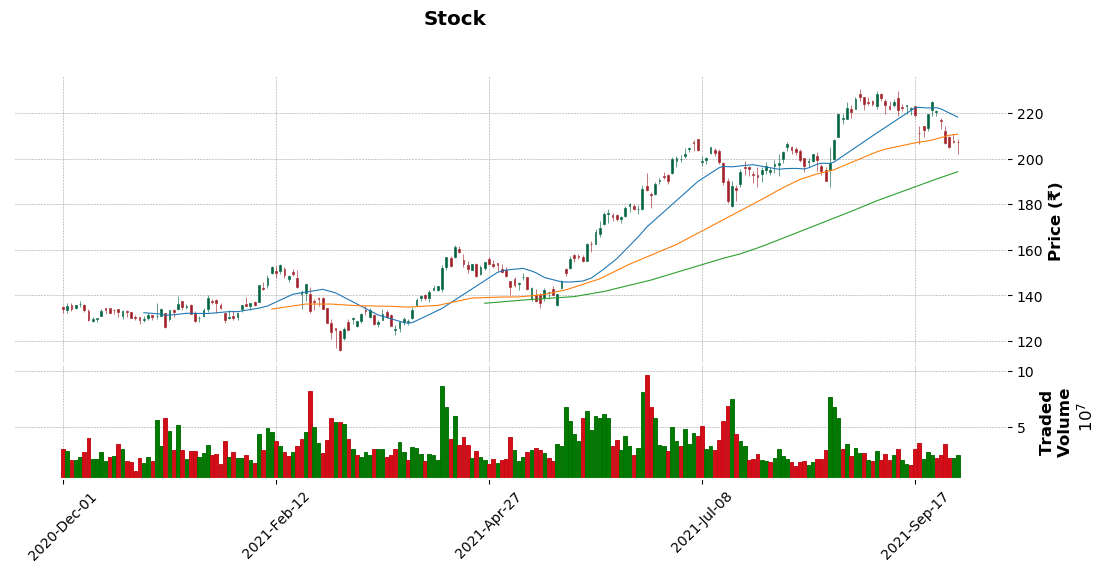

In [5]:
#Last one year chart
s  = mpf.make_mpf_style(base_mpf_style='charles',mavcolors=['#1f77b4','#ff7f0e','#2ca02c'])
mpf.plot(data[y:],
         volume=True,
         type='candle',
        figratio=(24,10),
         mav=(20,50,100),
         style= s,
         ylabel='Price (₹)',
         title='Stock',
         ylabel_lower='Traded\nVolume',
         tight_layout=False,
         #savefig=dict(fname=figsave("Year"),dpi=1200)
         #show_nontrading=True if needed to show trading day gaps
        )

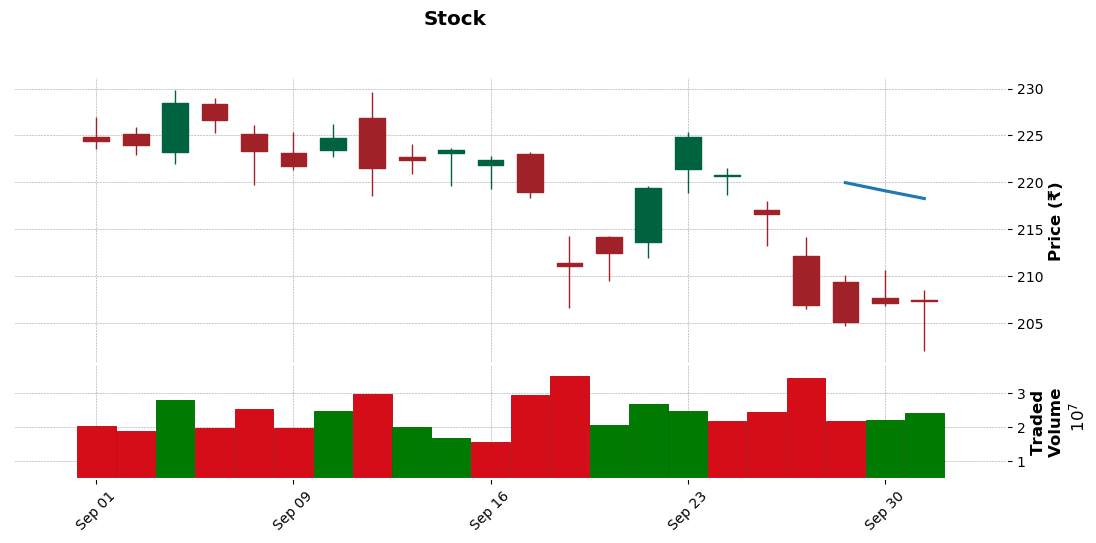

In [6]:
s  = mpf.make_mpf_style(base_mpf_style='charles',mavcolors=['#1f77b4','#ff7f0e','#2ca02c'])
mpf.plot(data[z:],
         volume=True,
         type='candle',
        figratio=(24,10),
         mav=(20,50,100),
         style= s,
         ylabel='Price (₹)',
         title='Stock',
         ylabel_lower='Traded\nVolume',
         tight_layout=False,
         #savefig=dict(fname=figsave("Month"),dpi=1200)
         #show_nontrading=True if needed to show trading day gaps
        )

# TA-Lib Pattern Recognition Candlestick

## https://mrjbq7.github.io/ta-lib/func_groups/pattern_recognition.html

In [7]:
import talib

In [8]:
df = yf.download("NVDA", start="2020-12-01", end="2021-10-04")

[*********************100%***********************]  1 of 1 completed


In [9]:

# Get Morning star pattern analysis
df['Morningstars'] = talib.CDLMORNINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

In [10]:
df.loc[df['Morningstars'] !=0]

,Open,High,Low,Close,Adj Close,Volume,Morningstars
Date,,,,,,,
2021-02-24,141.227493,145.067505,137.559998,144.990005,144.881226,44832000,100
2021-03-26,125.544998,128.562500,123.735001,128.392502,128.340454,36396800,100


In [11]:
df[df["Morningstars"] != 0]

,Open,High,Low,Close,Adj Close,Volume,Morningstars
Date,,,,,,,
2021-02-24,141.227493,145.067505,137.559998,144.990005,144.881226,44832000,100
2021-03-26,125.544998,128.562500,123.735001,128.392502,128.340454,36396800,100


In [12]:
df['Adj Close'].loc[df["Morningstars"] != 0]

Date
2021-02-24    144.881226
2021-03-26    128.340454
Name: Adj Close, dtype: float64

In [13]:
df['Adj Close'].loc[df["Morningstars"] != 0].index

DatetimeIndex(['2021-02-24', '2021-03-26'], dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
morning_stars = df['Morningstars']

In [15]:
morning_stars[morning_stars !=0]

Date
2021-02-24    100
2021-03-26    100
Name: Morningstars, dtype: int32

In [16]:
morning_stars[morning_stars !=0].index

DatetimeIndex(['2021-02-24', '2021-03-26'], dtype='datetime64[ns]', name='Date', freq=None)

# Create Candlestick Chart using mplfinance

In [17]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib import dates as mdates
import datetime as dt


In [18]:
# input
symbol = 'AMD'
start = '2019-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [19]:
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737061.0,18.010000,19.000000,17.980000,18.830000,18.830000,87148700,True
1,737062.0,18.420000,18.680000,16.940001,17.049999,17.049999,117277600,False
2,737063.0,17.549999,19.070000,17.430000,19.000000,19.000000,111878600,True
3,737066.0,19.440001,20.680000,19.000000,20.570000,20.570000,107157000,True
4,737067.0,21.190001,21.200001,19.680000,20.750000,20.750000,121271000,False


Text(0, 0.5, 'Price')

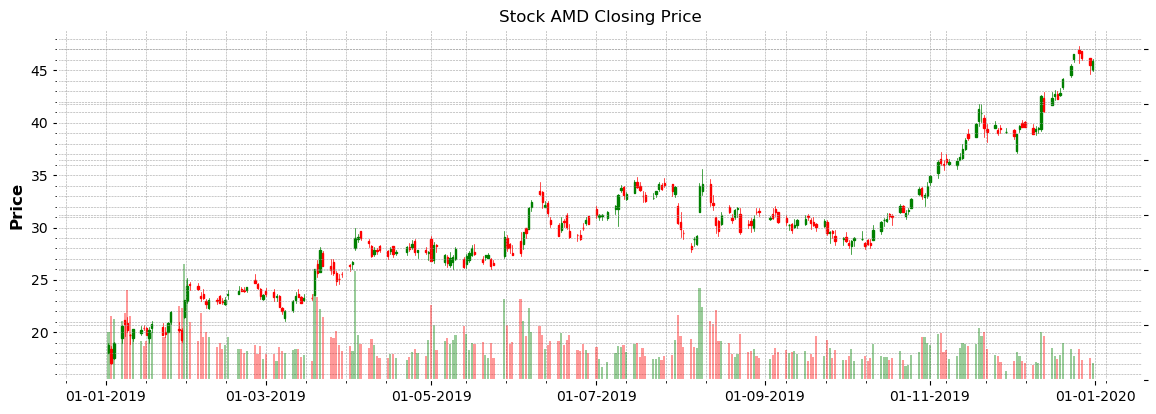

In [20]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

# Different types of background and style

In [21]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

Text(0, 0.5, 'Price')

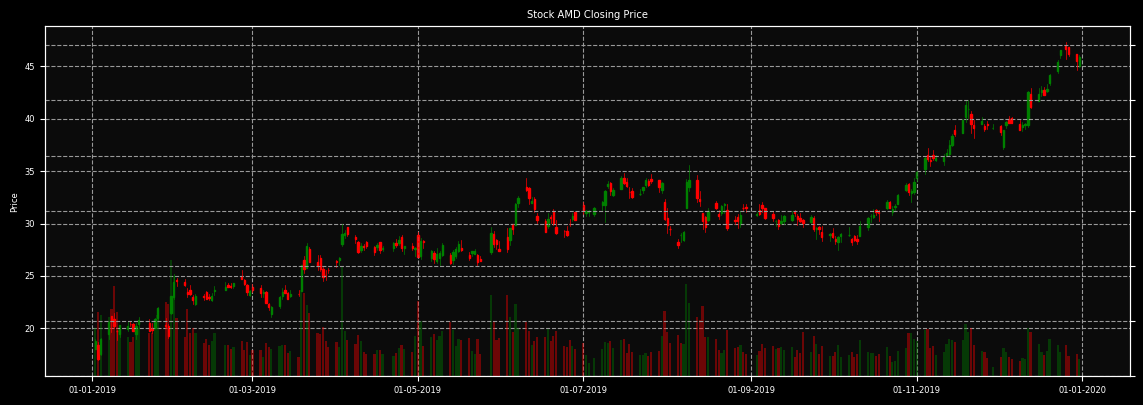

In [22]:
s = mpf.make_mpf_style(base_mpf_style='nightclouds', rc={'font.size': 6})
fig = mpf.figure(figsize=(14,10), style=s)
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.grid(True, which='both')
#ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

Text(0.5, 1.0, 'Stock AMD Closing Price')

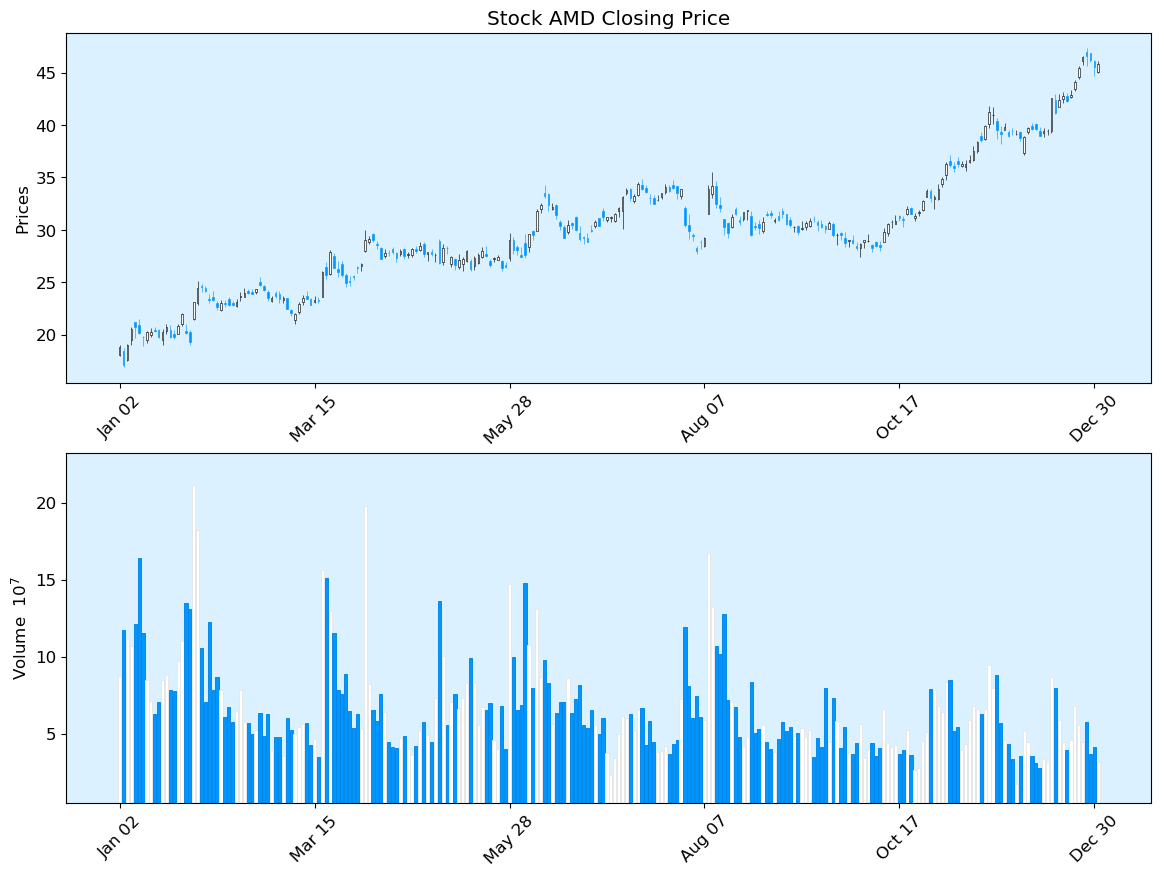

In [23]:
s = mpf.make_mpf_style(base_mpf_style='blueskies', rc={'font.size': 12})
fig = mpf.figure(figsize=(14,10), style=s)
ax = plt.subplot(2, 1, 1)
av = fig.add_subplot(2,1,2, sharex=ax) 
mpf.plot(df, type='candle', volume=av, ax=ax, ylabel = 'Prices')
ax.set_title('Stock '+ symbol +' Closing Price')

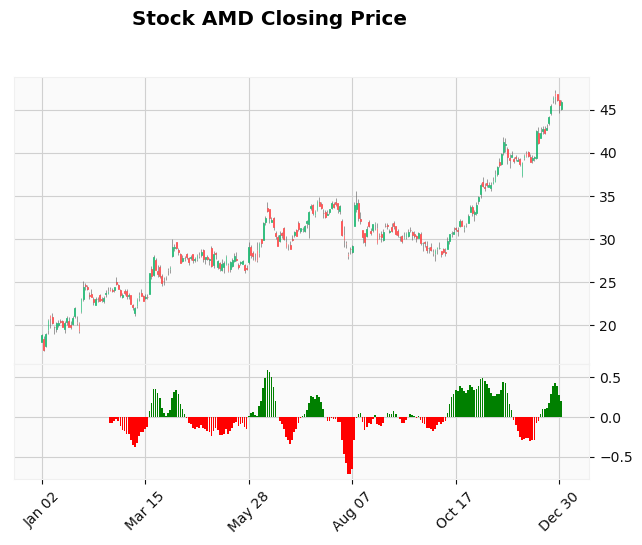

In [26]:
# Trim volume to avoid exponential form
df['Volume'] = df['Volume'] / 1000

# Create MACD
df["macd"], df["macd_signal"], df["macd_hist"] = talib.MACD(df['Close'])

# macd panel
colors = ['g' if v >= 0 else 'r' for v in df["macd_hist"]]
macd_hist_plot = mpf.make_addplot(df["macd_hist"], type='bar', panel=1, color=colors)

# Plot
mpf.plot(df, type='candle', style='yahoo', addplot=macd_hist_plot, title='Stock '+ symbol +' Closing Price', ylabel='')

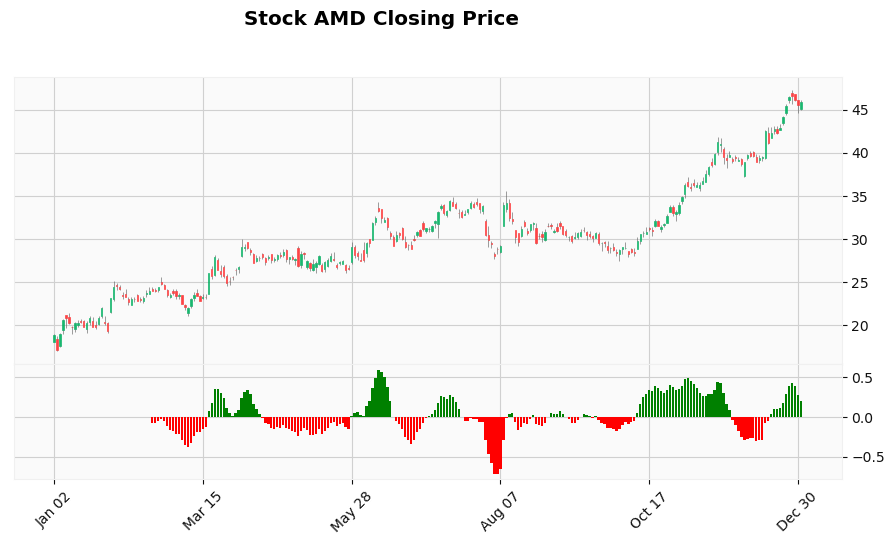

In [27]:
mpf.plot(df, type='candle', style='yahoo', figratio=(12,6) ,addplot=macd_hist_plot, title='Stock '+ symbol +' Closing Price', ylabel='')